In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from cassandrautils import *
from lib import *
import os

In [18]:
df_weather = getWeatherDF()

df_weather['forecast_timestamp'] = pd.to_datetime(df_weather['forecastdate'], format="%d-%m-%Y %H:%M")
print("Weather     from ", df_weather['forecast_timestamp'].min(), " To ", df_weather['forecast_timestamp'].max())

df_iqair = getIQAirDF()
df_iqair['current_ts'] = pd.to_datetime(df_iqair['current_ts'], format="%d-%m-%Y %H:%M")
print("Air Quality from ", df_iqair['current_ts'].min(), " To ", df_iqair['current_ts'].max())


Weather     from  2024-03-18 16:41:40  To  2024-03-19 13:21:28
Air Quality from  2024-03-18 15:00:00  To  2024-03-19 12:00:00


In [26]:
def add_data(df, filename):
    if os.path.exists(filename):
        data = pd.read_csv(filename)
        data = pd.concat([data, df]).drop_duplicates(keep='last').reset_index(drop=True)
    else:
        data = df.copy()
    data.to_csv(filename, index=False)
    

In [31]:
add_data(df_weather,'weather_data1.csv')
add_data(df_iqair, 'iqair_data.csv')

In [6]:
data_weather = pd.read_csv("weather_data.csv")
data_iqair = pd.read_csv("iqair_data.csv")

In [19]:
df_weather

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,Indiana,2024-03-19 09:58:06,clear sky,265.250000,72.0,1016.0,1710848954,1710892558,270.570007,271.160004,270.119995,4.63,2024-03-19 09:58:06
1,Indiana,2024-03-19 09:59:32,clear sky,265.250000,72.0,1016.0,1710848954,1710892558,270.570007,271.160004,270.119995,4.63,2024-03-19 09:59:32
2,Indiana,2024-03-19 10:00:50,clear sky,265.250000,72.0,1016.0,1710848954,1710892558,270.570007,271.160004,270.119995,4.63,2024-03-19 10:00:50
3,Indiana,2024-03-19 10:03:12,clear sky,265.250000,72.0,1016.0,1710848954,1710892558,270.570007,271.160004,270.119995,4.63,2024-03-19 10:03:12
4,Indiana,2024-03-19 10:04:29,clear sky,265.250000,72.0,1016.0,1710848954,1710892558,270.570007,271.160004,270.119995,4.63,2024-03-19 10:04:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,Iowa,2024-03-19 13:14:48,clear sky,270.410004,52.0,1008.0,1710850688,1710894303,275.519989,277.029999,274.339996,6.69,2024-03-19 13:14:48
6719,Iowa,2024-03-19 13:16:12,clear sky,270.410004,52.0,1008.0,1710850688,1710894303,275.519989,277.029999,274.339996,6.69,2024-03-19 13:16:12
6720,Iowa,2024-03-19 13:17:27,clear sky,270.410004,52.0,1008.0,1710850688,1710894303,275.519989,277.029999,274.339996,6.69,2024-03-19 13:17:27
6721,Iowa,2024-03-19 13:18:59,clear sky,270.410004,52.0,1008.0,1710850688,1710894303,275.519989,277.029999,274.339996,6.69,2024-03-19 13:18:59


In [20]:
df_iqair

,city,current_ts,country,current_pollution_aqicn,current_pollution_aqius,current_pollution_maincn,current_pollution_mainus,current_weather_hu,current_weather_ic,current_weather_pr,current_weather_tp,current_weather_wd,current_weather_ws,latitude,longitude,state
0,Monument,2024-03-19 11:00:00,USA,0,0,p2,p2,54,01n,1013,1,340,4.12,-104.872760,39.091660,Colorado
1,Sparta,2024-03-19 10:00:00,USA,4,12,p2,p2,44,01n,1004,0,230,5.14,-90.812910,43.944130,Wisconsin
2,Eagan,2024-03-19 12:00:00,USA,7,19,p2,p2,54,04n,1004,1,300,4.63,-93.166890,44.804130,Minnesota
3,Ballenger Creek,2024-03-19 12:00:00,USA,8,22,p2,p2,55,01d,1014,1,291,5.33,-77.435260,39.372600,Maryland
4,Gardnerville,2024-03-19 11:00:00,USA,3,10,p2,p2,55,01n,1022,3,84,2.24,-119.749620,38.941300,Nevada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,North Pole,2024-03-18 16:00:00,USA,4,10,p2,p2,73,04d,1022,-13,220,1.54,-147.310297,64.762973,Alaska
111,Saint Charles,2024-03-19 10:00:00,USA,7,19,p2,p2,62,01n,1019,-1,221,3.79,-90.446900,38.902200,Missouri
112,Arnold,2024-03-19 10:00:00,USA,7,16,p1,p2,72,01n,1022,-2,204,0.89,-90.398540,38.448633,Missouri
113,West Orange,2024-03-19 12:00:00,USA,2,6,p2,p2,55,01d,1009,1,310,6.69,-74.239040,40.798710,New Jersey


**Transform Openweathermap data**

In [10]:
def timezone_offset(data):
    df = data.copy()
    #df = data.drop(columns='forecast_timestamp' )
    time_columns = ['sunset', 'sunrise']
    df[time_columns] = df[['sunrise', 'sunset']].apply(pd.to_datetime, unit='s')
    df['sunset_time'] = df[time_columns[0]].apply(lambda x: x.time() if pd.notnull(x) else x)
    df['sunrise_time'] = df[time_columns[1]].apply(lambda x: x.time() if pd.notnull(x) else x)    
    for location, timezone in timezones.items():
        df.loc[df['location'] == location, 'sunrise'] = pd.to_datetime(df.loc[df['location'] == location, 'sunrise']).dt.tz_localize('UTC').dt.tz_convert(timezone)
        df.loc[df['location'] == location, 'sunset'] = pd.to_datetime(df.loc[df['location'] == location, 'sunset']).dt.tz_localize('UTC').dt.tz_convert(timezone)
    
    return df
    
df_weather = timezone_offset(data_weather)
df_weather.head(2)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp,sunset_time,sunrise_time
0,Indiana,2024-03-01 10:32:38,clear sky,267.980011,65.0,1025.0,2024-03-01 18:37:01-05:00,2024-03-01 07:17:47-05:00,271.829987,273.149994,270.179993,3.09,2024-03-01 10:32:38,12:17:47,23:37:01
1,Indiana,2024-03-01 10:34:07,clear sky,267.980011,65.0,1025.0,2024-03-01 18:37:01-05:00,2024-03-01 07:17:47-05:00,271.829987,273.149994,270.179993,3.09,2024-03-01 10:34:07,12:17:47,23:37:01


In [11]:
def sun_cycle(data,time_columns):
    df= data.copy()
    for col in time_columns:
        df[f'{col}_hour'] = df[col].apply(lambda x: x.hour)
        df[f'{col}_minute'] = df[col].apply(lambda x: x.minute)
        df[f'{col}_second'] = df[col].apply(lambda x: x.second)
        max_time = 86400 
        total_seconds = (df[f'{col}_hour'] * 3600) + (df[f'{col}_minute'] * 60) + df[f'{col}_second']
        df[f'{col}_sin'] = np.sin(2 * np.pi * total_seconds / max_time)
        df[f'{col}_cos'] = np.cos(2 * np.pi * total_seconds / max_time)
    df = df.rename(columns={
        'sunrise_time_sin': 'sunrise_sin',
        'sunset_time_sin': 'sunset_sin',
        'sunrise_time_cos': 'sunrise_cos',
        'sunset_time_cos': 'sunset_cos'
    })
    columns_to_drop = ['sunset_time', 'sunrise_time',
                       'sunset_time_hour','sunset_time_minute', 'sunset_time_second',
                       'sunrise_time_hour', 'sunrise_time_minute','sunrise_time_second']

    df = df.drop(columns=columns_to_drop, errors='ignore') 
    return df
    
time_columns = ['sunset_time', 'sunrise_time']
df_weather = sun_cycle(df_weather,time_columns)
df_weather.head(2)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp,sunset_sin,sunset_cos,sunrise_sin,sunrise_cos
0,Indiana,2024-03-01 10:32:38,clear sky,267.980011,65.0,1025.0,2024-03-01 18:37:01-05:00,2024-03-01 07:17:47-05:00,271.829987,273.149994,270.179993,3.09,2024-03-01 10:32:38,-0.077517,-0.996991,-0.100116,0.994976
1,Indiana,2024-03-01 10:34:07,clear sky,267.980011,65.0,1025.0,2024-03-01 18:37:01-05:00,2024-03-01 07:17:47-05:00,271.829987,273.149994,270.179993,3.09,2024-03-01 10:34:07,-0.077517,-0.996991,-0.100116,0.994976


In [12]:
def weather_data(data):
    df=data.copy()
    df['forecast_timestamp'] = pd.to_datetime(df['forecast_timestamp'])
    df['day'] = df['forecast_timestamp'].dt.date
    df['time'] = df['forecast_timestamp'].dt.hour
    columns_to_drop = ['sunset', 'sunrise','forecast_timestamp']
    df = df.drop(columns=columns_to_drop, errors='ignore') 
    return df


df_weather = weather_data(df_weather)
df_weather.head()

,location,forecastdate,description,feels_like,humidity,pressure,temp,temp_max,temp_min,wind,sunset_sin,sunset_cos,sunrise_sin,sunrise_cos,day,time
0,Indiana,2024-03-01 10:32:38,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,-0.077517,-0.996991,-0.100116,0.994976,2024-03-01,10
1,Indiana,2024-03-01 10:34:07,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,-0.077517,-0.996991,-0.100116,0.994976,2024-03-01,10
2,Indiana,2024-03-01 10:35:30,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,-0.077517,-0.996991,-0.100116,0.994976,2024-03-01,10
3,Indiana,2024-03-01 10:36:50,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,-0.077517,-0.996991,-0.100116,0.994976,2024-03-01,10
4,Indiana,2024-03-01 10:38:05,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,-0.077517,-0.996991,-0.100116,0.994976,2024-03-01,10


In [13]:
display(df_weather.info())
display(df_weather.isnull().sum())
display(df_weather.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57867 entries, 0 to 57866
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      57867 non-null  object 
 1   forecastdate  57867 non-null  object 
 2   description   57867 non-null  object 
 3   feels_like    57867 non-null  float64
 4   humidity      57867 non-null  float64
 5   pressure      57867 non-null  float64
 6   temp          57867 non-null  float64
 7   temp_max      57867 non-null  float64
 8   temp_min      57867 non-null  float64
 9   wind          57867 non-null  float64
 10  sunset_sin    57867 non-null  float64
 11  sunset_cos    57867 non-null  float64
 12  sunrise_sin   57867 non-null  float64
 13  sunrise_cos   57867 non-null  float64
 14  day           57867 non-null  object 
 15  time          57867 non-null  int64  
dtypes: float64(11), int64(1), object(4)
memory usage: 7.1+ MB


None

location        0
forecastdate    0
description     0
feels_like      0
humidity        0
pressure        0
temp            0
temp_max        0
temp_min        0
wind            0
sunset_sin      0
sunset_cos      0
sunrise_sin     0
sunrise_cos     0
day             0
time            0
dtype: int64

,feels_like,humidity,pressure,temp,temp_max,temp_min,wind,sunset_sin,sunset_cos,sunrise_sin,sunrise_cos,time
count,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000,57867.000000
mean,275.271597,66.710837,1013.934073,277.608157,278.824938,276.231595,3.274969,-0.046023,-0.886359,0.048898,0.886359,11.176301
std,8.869384,15.956622,7.717632,7.481187,7.572411,7.428039,2.245688,0.355734,0.292758,0.351274,0.297637,2.623559
min,231.820007,10.000000,993.000000,238.820007,238.820007,238.820007,0.000000,-0.971411,-0.999998,-0.938191,-0.604657,5.000000
25%,270.324997,55.000000,1009.000000,273.709991,274.910004,272.149994,1.720000,-0.195090,-0.994998,-0.182808,0.940140,9.000000
50%,275.339996,65.000000,1014.000000,277.640015,278.970001,275.809998,2.680000,-0.008945,-0.980026,-0.006472,0.977737,11.000000
75%,279.380005,78.000000,1019.000000,280.779999,282.399994,279.029999,4.630000,0.205421,-0.948277,0.222045,0.995452,13.000000
max,310.529999,100.000000,1043.000000,308.239990,308.239990,308.239990,12.080000,0.969588,0.492740,0.935212,0.999999,18.000000


In [14]:
print("Get data of areas Alabama and Virginia")
filtered_weather = df_weather.loc[(df_weather['location'] == "Alabama") | (df_weather['location'] == "Virginia")]
filtered_weather['location'].unique()

Get data of areas Alabama and Virginia


array(['Alabama', 'Virginia'], dtype=object)

Text(0.5, 1.0, 'Temperature over time in Alabama and Virginia')

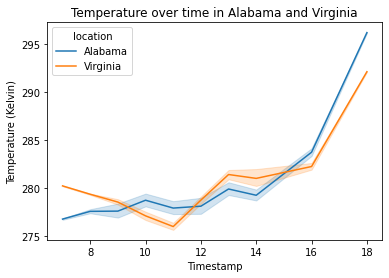

In [15]:
sns.lineplot(data=filtered_weather, x='time', y="temp", hue="location")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Kelvin)')
plt.title('Temperature over time in Alabama and Virginia')

Text(0.5, 1.0, 'Wind over time in Alabama and Virginia')

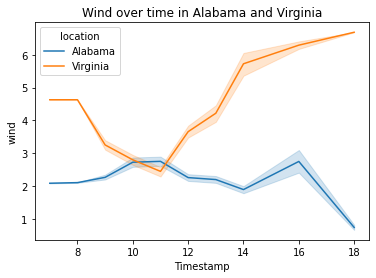

In [16]:
sns.lineplot(data=filtered_weather, x="time", y="wind", hue='location')
plt.xlabel('Timestamp')
plt.ylabel('wind')
plt.title('Wind over time in Alabama and Virginia')

**Transform Iqair data**

In [18]:
def iqair_data(data):
    df = data.copy()
    df['current_ts'] = pd.to_datetime(df['current_ts'])
    df['day'] = df['current_ts'].dt.date
    df['time'] = df['current_ts'].dt.hour
    df = df.drop(columns=['current_ts','city','country'])
    df = df.rename(columns={
        'state': 'location'})
    return df
    
df_iqair= iqair_data(data_iqair)
df_iqair.head(2)

,current_pollution_aqicn,current_pollution_aqius,current_pollution_maincn,current_pollution_mainus,current_weather_hu,current_weather_ic,current_weather_pr,current_weather_tp,current_weather_wd,current_weather_ws,latitude,longitude,location,day,time
0,0,1,p2,p2,100,10n,1022,5,80,2.06,-84.62690,34.78500,Georgia,2024-03-02,5
1,32,73,p2,p2,66,01n,1029,-17,70,3.60,-165.40639,64.50111,Alaska,2024-03-02,7


In [20]:
display(df_iqair.info())
display(df_iqair.isnull().sum())
display(df_iqair.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   current_pollution_aqicn   1191 non-null   int64  
 1   current_pollution_aqius   1191 non-null   int64  
 2   current_pollution_maincn  1191 non-null   object 
 3   current_pollution_mainus  1191 non-null   object 
 4   current_weather_hu        1191 non-null   int64  
 5   current_weather_ic        1191 non-null   object 
 6   current_weather_pr        1191 non-null   int64  
 7   current_weather_tp        1191 non-null   int64  
 8   current_weather_wd        1191 non-null   int64  
 9   current_weather_ws        1191 non-null   float64
 10  latitude                  1191 non-null   float64
 11  longitude                 1191 non-null   float64
 12  location                  1191 non-null   object 
 13  day                       1191 non-null   object 
 14  time    

None

current_pollution_aqicn     0
current_pollution_aqius     0
current_pollution_maincn    0
current_pollution_mainus    0
current_weather_hu          0
current_weather_ic          0
current_weather_pr          0
current_weather_tp          0
current_weather_wd          0
current_weather_ws          0
latitude                    0
longitude                   0
location                    0
day                         0
time                        0
dtype: int64

,current_pollution_aqicn,current_pollution_aqius,current_weather_hu,current_weather_pr,current_weather_tp,current_weather_wd,current_weather_ws,latitude,longitude,time
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,9.274559,22.266163,74.989924,1016.273720,4.397985,164.455080,3.253468,-93.534914,39.730739,10.248531
std,8.556349,15.791409,16.645131,8.275445,7.049129,108.464924,2.258810,18.644709,6.107939,2.918563
min,0.000000,0.000000,8.000000,985.000000,-36.000000,0.000000,0.000000,-165.406390,19.202970,4.000000
25%,4.000000,11.000000,62.500000,1011.000000,0.000000,80.000000,1.540000,-105.653605,36.021801,8.000000
50%,7.000000,19.000000,78.000000,1016.000000,4.000000,160.000000,2.770000,-88.395600,40.020850,10.000000
75%,11.500000,29.000000,89.000000,1021.500000,8.000000,244.500000,4.630000,-79.911300,43.083340,11.000000
max,102.000000,117.000000,100.000000,1041.000000,28.000000,360.000000,13.380000,-68.016195,70.255280,18.000000


In [21]:
filtered_iqair = df_iqair.copy()
filtered_iqair['day'] = pd.to_datetime(filtered_iqair['day'])
filtered_iqair = filtered_iqair.query("'2024-03-01' <= day <= '2024-03-07'")
filtered_iqair.day.unique()

array(['2024-03-02T00:00:00.000000000', '2024-03-01T00:00:00.000000000',
       '2024-03-04T00:00:00.000000000', '2024-03-05T00:00:00.000000000',
       '2024-03-07T00:00:00.000000000'], dtype='datetime64[ns]')

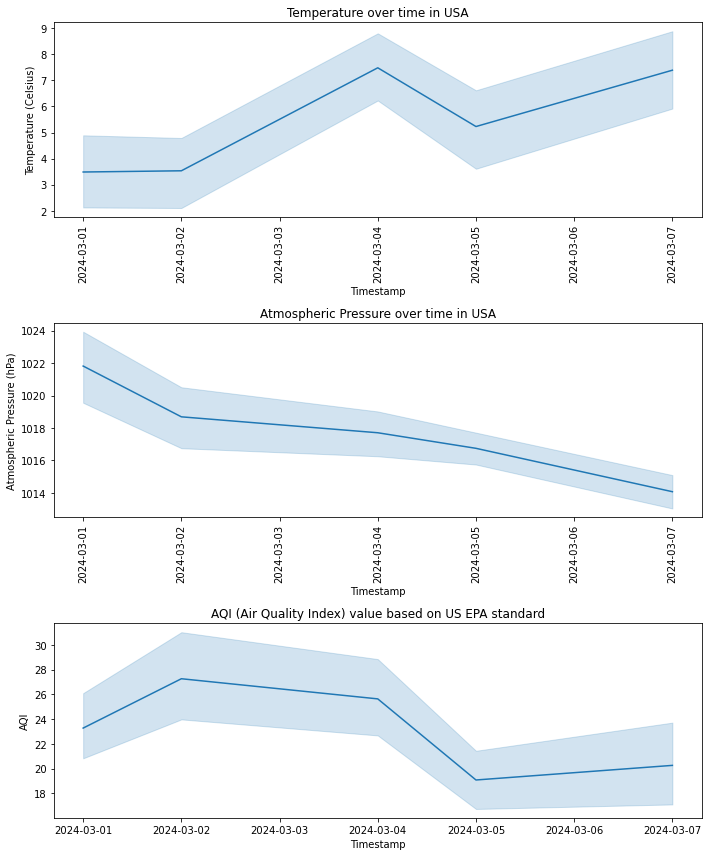

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

sns.lineplot(data=filtered_iqair, x="day", y="current_weather_tp", ax=ax1)
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Temperature (Celsius)')
ax1.set_title('Temperature over time in USA')
ax1.tick_params(axis='x', rotation=90)

sns.lineplot(data=filtered_iqair, x="day", y="current_weather_pr", ax=ax2)
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Atmospheric Pressure (hPa)')
ax2.set_title('Atmospheric Pressure over time in USA')
ax2.tick_params(axis='x', rotation=90)

sns.lineplot(data=filtered_iqair, x="day", y="current_pollution_aqius")
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.title('AQI (Air Quality Index) value based on US EPA standard')


plt.tight_layout()
plt.show()


**Save file.csv**

In [ ]:
add_weather_data(df_weather,'weather_data.csv')
add_iqair_data(df_iqair, 'iqair_data.csv')

**Merge two data**

In [25]:
df_merge = pd.merge(df_weather, df_iqair, on=['day','location','time'], how='inner')
df_merge.head()

,location,forecastdate,description,feels_like,humidity,pressure,temp,temp_max,temp_min,wind,...,current_pollution_maincn,current_pollution_mainus,current_weather_hu,current_weather_ic,current_weather_pr,current_weather_tp,current_weather_wd,current_weather_ws,latitude,longitude
0,Indiana,2024-03-01 10:32:38,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,...,p2,p2,70,02n,1028,-2,178,3.1,-85.629444,41.169722
1,Indiana,2024-03-01 10:34:07,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,...,p2,p2,70,02n,1028,-2,178,3.1,-85.629444,41.169722
2,Indiana,2024-03-01 10:35:30,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,...,p2,p2,70,02n,1028,-2,178,3.1,-85.629444,41.169722
3,Indiana,2024-03-01 10:36:50,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,...,p2,p2,70,02n,1028,-2,178,3.1,-85.629444,41.169722
4,Indiana,2024-03-01 10:38:05,clear sky,267.980011,65.0,1025.0,271.829987,273.149994,270.179993,3.09,...,p2,p2,70,02n,1028,-2,178,3.1,-85.629444,41.169722


In [34]:
add_data(df_merge,"merge_data.csv")